In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IST347/Week_12/california_housing_sklearn.csv')

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.shape

(20640, 9)

In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [7]:
#help(MinMaxScaler)

In [8]:
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Start create the ANN for a predction problem

In [9]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [10]:
# initiate Sequential
nn_model = Sequential()

#create two hidden layers with 8 neuron
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(8, activation='relu'))

# create output layer
nn_model.add(Dense(1))

#compile this model
nn_model.compile(optimizer='rmsprop', loss ='mse')


In [11]:
# verbose shows the running process
nn_model.fit(scaled_X_train, y_train, batch_size=128, epochs=150)


Epoch 1/150
129/129 [==============================] - 1s 1ms/step - loss: 4.3316
Epoch 2/150
129/129 [==============================] - 0s 1ms/step - loss: 1.3713
Epoch 3/150
129/129 [==============================] - 0s 1ms/step - loss: 1.0405
Epoch 4/150
129/129 [==============================] - 0s 1ms/step - loss: 0.8344
Epoch 5/150
129/129 [==============================] - 0s 1ms/step - loss: 0.6540
Epoch 6/150
129/129 [==============================] - 0s 1ms/step - loss: 0.6034
Epoch 7/150
129/129 [==============================] - 0s 1ms/step - loss: 0.5757
Epoch 8/150
129/129 [==============================] - 0s 1ms/step - loss: 0.5752
Epoch 9/150
129/129 [==============================] - 0s 1ms/step - loss: 0.5675
Epoch 10/150
129/129 [==============================] - 0s 1ms/step - loss: 0.5579
Epoch 11/150
129/129 [==============================] - 0s 1ms/step - loss: 0.5513
Epoch 12/150
129/129 [==============================] - 0s 1ms/step - loss: 0.5349
Epoch 13/150


In [12]:
loss_df = pd.DataFrame(nn_model.history.history)

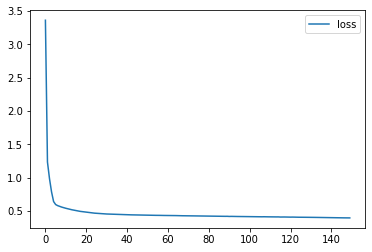

In [13]:
loss_df.plot()

Model evaluation with a test set

In [14]:
nn_model.evaluate(scaled_X_test, y_test, verbose=0)

0.41651687026023865

In [15]:
y_pred = nn_model.predict(scaled_X_test)

In [16]:
pred_df = pd.Series(y_pred.reshape(4128,))
true_df = pd.DataFrame(y_test, columns=['True Y'])

In [17]:
result = pd.concat([pred_df, true_df], axis =1)
result.columns = ['Test Y', 'True Y']
result

,Test Y,True Y
0,0.720310,0.47700
1,1.765797,0.45800
2,3.547625,5.00001
3,2.868215,2.18600
4,2.830212,2.78000
...,...,...
4123,1.882061,2.63300
4124,2.594848,2.66800
4125,4.774085,5.00001
4126,0.897687,0.72300


In [18]:
from tensorflow.keras.models import load_model

In [19]:
nn_model.save('/content/drive/MyDrive/IST347/Week_12/My_CA_House_Model.h5')

In [20]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
